<a href="https://colab.research.google.com/github/NikhilGeorge01/ML-Prac/blob/main/TitanicFeatureSelection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Filter Methods:

i) Basic Methods
Constant Features
Quasi-constant features
Duplicate features


ii) Statistical Methods
Correlation
Mutual Information  (Regression and Classification)
Chi-Square | Fischer Square
Univariate feature selection (Or) ANOVA (Regression and Classification)
Univariate roc-auc | mse  (Regression and Classification)



2. Wrapper Methods
Forward Selection - Add one feature at a time recursively
Backward Selection - Removes one feature at a time recursively
Exhaustive Search - searches across all possible feature combinations
Recursive Feature Elimination (RFE) - i) Ranking Features ii) Iterative Removal  iii) Stopping Criterion

**TITANIC DATASET**

In [1]:
#160123737198
import pandas as pd

In [2]:
#160123737198
titanic_train_df = pd.read_csv('/content/drive/MyDrive/MLDatasets/titanic_train.csv')
titanic_test_df = pd.read_csv('/content/drive/MyDrive/MLDatasets/titanic_test.csv')

In [3]:
#160123737198
titanic_df = pd.concat([titanic_train_df, titanic_test_df])

In [4]:
#160123737198
titanic_test_df.shape

(418, 11)

In [5]:
#160123737198
titanic_train_df.shape

(891, 12)

In [6]:
#160123737198
titanic_train_df.shape

(891, 12)

In [7]:
#160123737198
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#160123737198
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#160123737198
titanic_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
#160123737198
titanic_train_df['Age'] = titanic_train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [11]:
#160123737198
titanic_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
#160123737198
titanic_train_df.drop('Cabin', axis=1, inplace=True)

In [13]:
#160123737198
ttd = titanic_train_df

In [14]:
#160123737198
ttd = ttd.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [15]:
#160123737198
ttd['Sex'] = ttd['Sex'].map({'male': 0, 'female': 1})

In [16]:
#160123737198
ttd['Embarked'].fillna(ttd['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3383038126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ttd['Embarked'].fillna(ttd['Embarked'].mode()[0], inplace=True)


In [17]:
#160123737198
print(set(ttd['Embarked']))

{'Q', 'S', 'C'}


In [18]:
#160123737198
ttd['Embarked'] = ttd['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [19]:
#160123737198
ttd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [20]:
#160123737198
X = ttd.drop('Survived', axis=1)
y = ttd['Survived']

In [21]:
#160123737198
#Constant Features
constant_features = [feature for feature in X.columns if X[feature].std() == 0]

In [22]:
#160123737198
print(len(constant_features))

0


In [23]:
#160123737198
#Quasi Constant features
quasi_const_feat = []

for feature in X.columns:
  predominant = (X[feature].value_counts() / X.shape[0]).sort_values(ascending=False).values[0]
  if predominant >= 0.999:
    quasi_const_feat.append(feature)
print(len(quasi_const_feat))

0


In [24]:
#160123737198
#Duplicate Features
duplicated_features = []
for i in range(0, len(X.columns)):
  col_1 = X.columns[i]
  for col_2 in X.columns[i+1:]:
    if X[col_1].equals(X[col_2]):
      duplicated_features.append(col_2)

In [25]:
#160123737198
print(len(duplicated_features))

0


In [26]:
#160123737198
import matplotlib.pyplot as plt
import seaborn as sns

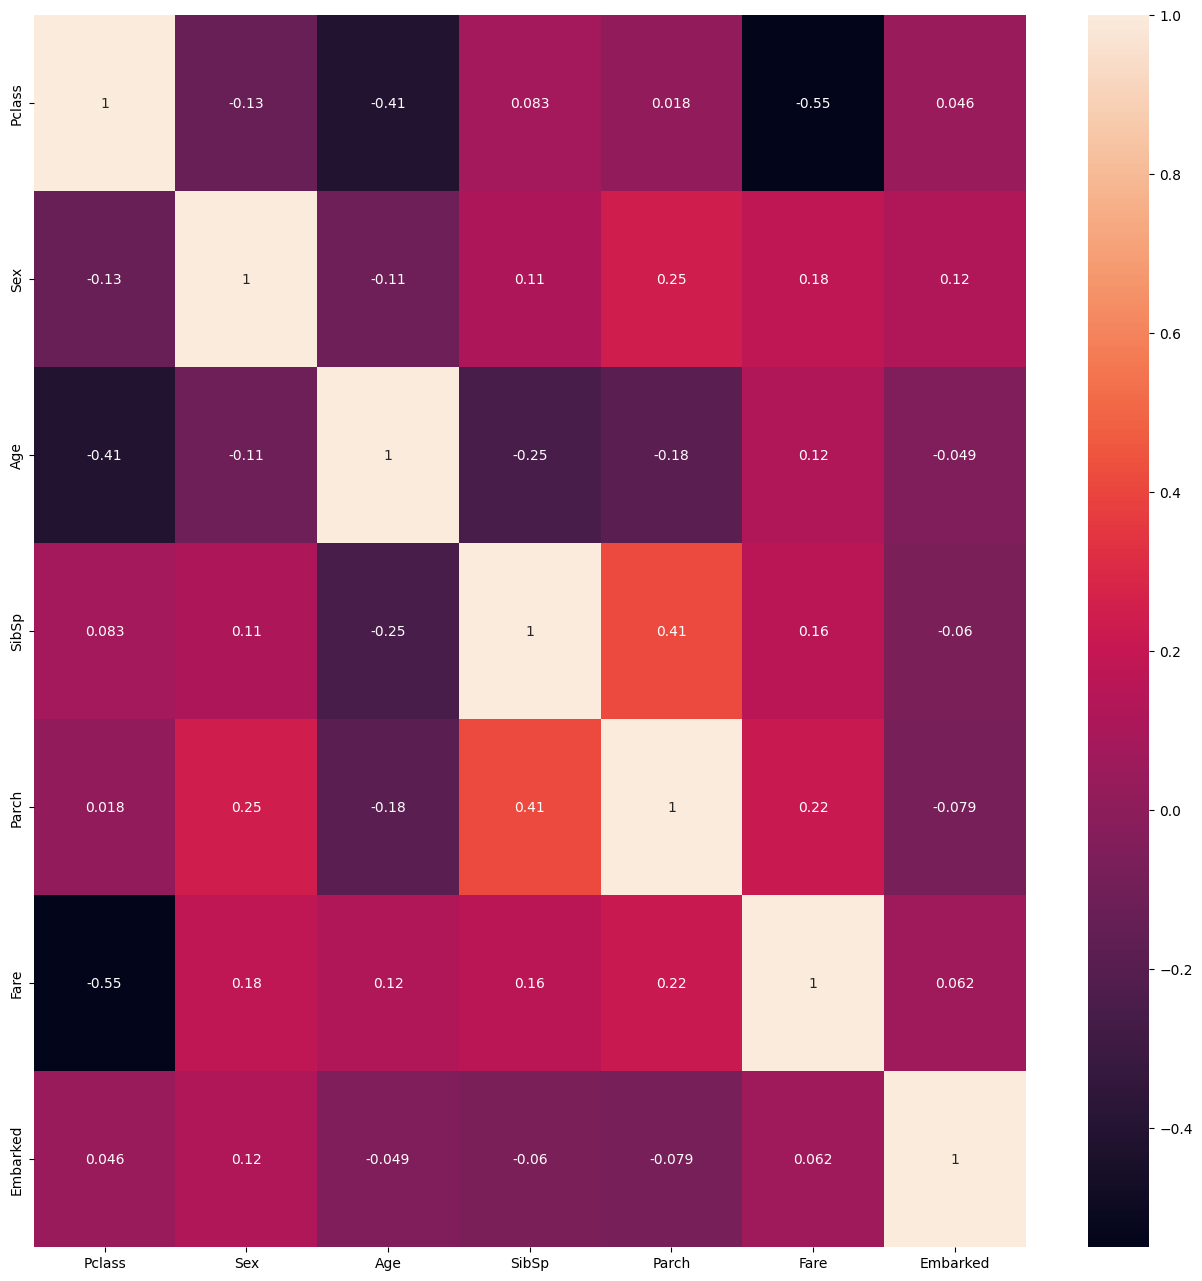

In [27]:
#160123737198
corrmat = X.corr()
fig,ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat, annot=True, ax=ax)
plt.show()

In [28]:
#160123737198
grouped_features_ls = []
correlated_groups =[]
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [29]:
#160123737198
corr_features = correlation(X, 0.9)
print(len(corr_features))

0


In [30]:
#160123737198
from sklearn.feature_selection import mutual_info_classif

In [31]:
#160123737198
mi = mutual_info_classif(X.fillna(0), y)
mi = pd.Series(mi)

<Axes: >

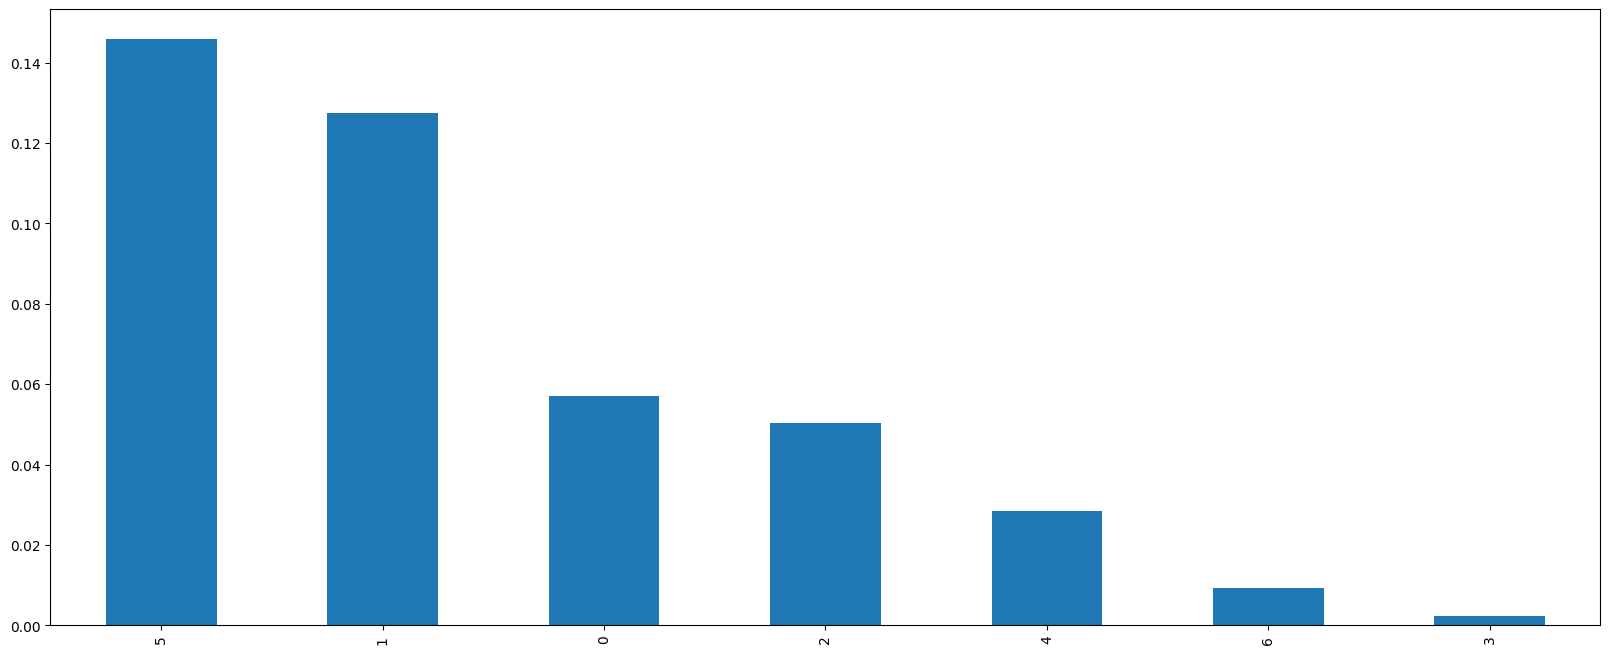

In [32]:
#160123737198
mi.sort_values(ascending=False).plot.bar(figsize = (20,8))

In [33]:
#160123737198
from sklearn.feature_selection import SelectKBest

In [34]:
#160123737198
sel = SelectKBest(mutual_info_classif, k=5)
sel.fit(X.fillna(0), y)
X.columns[sel.get_support()]

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [37]:
#160123737198
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [38]:
#160123737198
X_train,X_test, y_train,y_test = train_test_split(ttd[['Pclass', 'Sex', 'Embarked']], ttd['Survived'], test_size=0.3, random_state=8)

In [39]:
#160123737198
f_score = chi2(X_train.fillna(0), y_train)
f_score

(array([ 23.3402987 , 124.15531308,   6.17851479]),
 array([1.35726332e-06, 7.79010868e-29, 1.29310775e-02]))

In [40]:
#160123737198
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

,0
Sex,7.790109e-29
Pclass,1.357263e-06
Embarked,1.293108e-02


In [42]:
#160123737198
from sklearn.feature_selection import SelectKBest, f_classif

# Perform ANOVA filter method using SelectKBest to select top K features
# Let's select the top 5 features for demonstration
selector_anova = SelectKBest(f_classif, k=5)
selector_anova.fit(X.fillna(0), y)

# Get the names of the selected features
selected_features_anova = X.columns[selector_anova.get_support()]

print("Selected features based on ANOVA:")
print(selected_features_anova)

Selected features based on ANOVA:
Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')


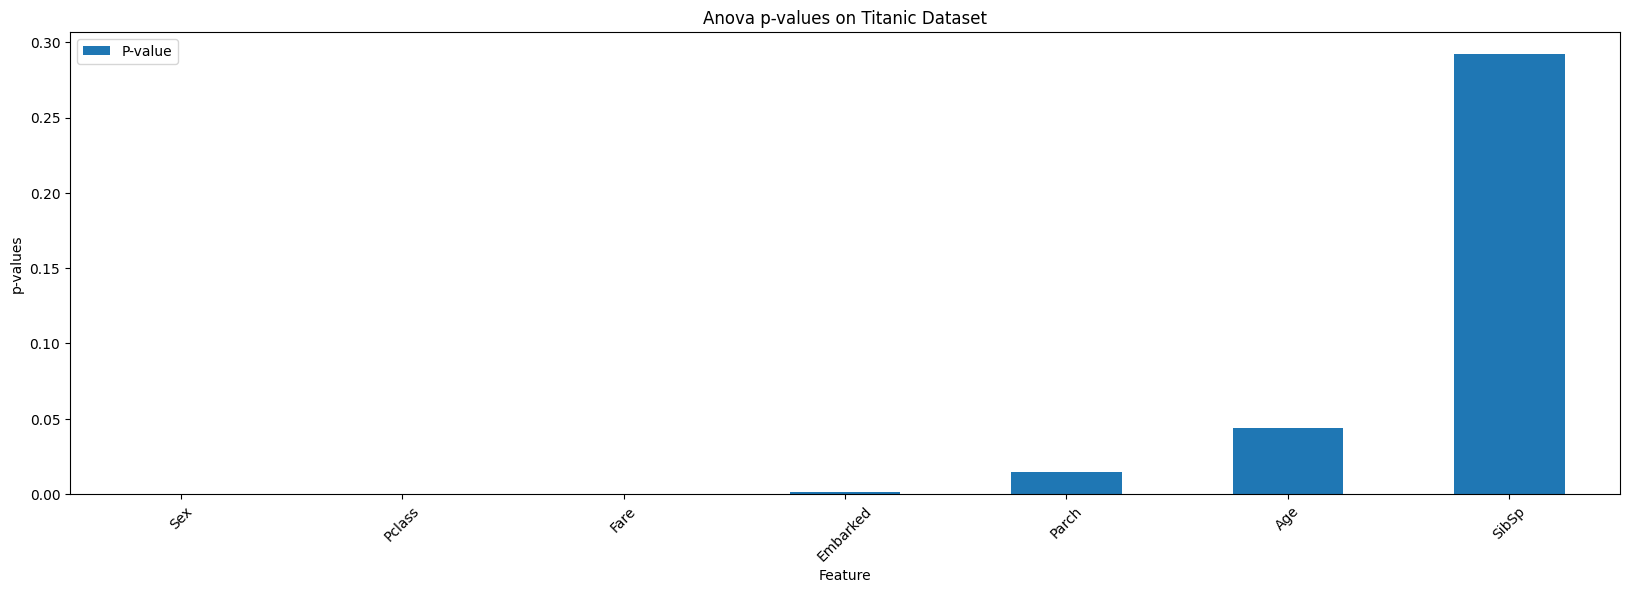

In [44]:
#160123737198
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt

# Perform ANOVA test
f_scores, p_values = f_classif(X.fillna(0), y)

# Create a DataFrame for the results
anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values})

# Sort features based on p-values and make a bar plot
anova_results.sort_values(by='P-value', ascending=True).plot.bar(x='Feature', y='P-value', figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova p-values on Titanic Dataset")
plt.show()

In [46]:
#160123737198
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Calculate univariate ROC-AUC for each feature
roc_auc_scores = []
for feature in X.columns:
    # For numerical features, we can directly calculate ROC-AUC
    # For categorical features, we might need one-hot encoding, but in this
    # case, they are already encoded as numerical.
    # Handle potential infinite values after filling NaNs with 0
    feature_values = X[feature].fillna(0)
    if np.isinf(feature_values).any():
        # Scale the feature to handle potential large values after imputation
        scaler = MinMaxScaler()
        feature_values = scaler.fit_transform(feature_values.values.reshape(-1, 1))
        feature_values = feature_values.flatten()

    try:
        score = roc_auc_score(y, feature_values)
        roc_auc_scores.append(score)
    except ValueError:
        # Handle cases where a feature might have only one class after filling NaNs
        roc_auc_scores.append(0.5) # Assign 0.5 (random guess) if ROC-AUC cannot be calculated

# Create a pandas Series with feature names as index
univariate_roc_auc = pd.Series(roc_auc_scores, index=X.columns)

# Display the ROC-AUC scores
print("Univariate ROC-AUC scores:")
print(univariate_roc_auc.sort_values(ascending=False))

Univariate ROC-AUC scores:
Sex         0.766873
Fare        0.692122
Embarked    0.563065
Parch       0.561217
SibSp       0.543162
Age         0.473737
Pclass      0.318583
dtype: float64


In [53]:
#160123737198
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Initialize Sequential Feature Selector for Forward Selection
sfs_forward = SFS(lr,
                  k_features='best', # Select the best number of features
                  forward=True,      # Set to True for Forward Selection
                  floating=False,
                  verbose=2,
                  scoring='accuracy',
                  cv=5)

# Perform Forward Selection
sfs_forward = sfs_forward.fit(X, y)

# Get the selected features
selected_features_forward = list(sfs_forward.k_feature_names_)

print("Features selected by Forward Selection:")
print(selected_features_forward)

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s finished

[2025-08-21 14:13:57] Features: 1/7 -- score: 0.7867365513778168[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s finished

[2025-08-21 14:13:58] Features: 2/7 -- score: 0.7889837423890528[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished

[2025-08-21 14:13:59] Features: 3/7 -- score: 0.7990898248697508[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished

[2025-08-21 14:13:59] Features: 4/7 -- score: 0.8047140794677045[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished

[2025-08-21 14:13:59] Features: 5/7 -- score: 0.8080911430544223[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2025-08-21 14:14:00] Features: 6/7 -- score: 0.8092084614901764

Features selected by Forward Selection:
['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished

[2025-08-21 14:14:00] Features: 7/7 -- score: 0.8013621241604421

In [49]:
#160123737198
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Initialize Sequential Feature Selector for Backward Selection
sfs_backward = SFS(lr,
                   k_features='best', # Select the best number of features
                   forward=False,     # Set to False for Backward Selection
                   floating=False,
                   verbose=2,
                   scoring='accuracy',
                   cv=5)

# Perform Backward Selection
sfs_backward = sfs_backward.fit(X, y)

# Get the selected features
selected_features_backward = list(sfs_backward.k_feature_names_)

print("Features selected by Backward Selection:")
print(selected_features_backward)

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s finished

[2025-08-21 14:11:12] Features: 6/1 -- score: 0.8092084614901764[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s finished

[2025-08-21 14:11:13] Features: 5/1 -- score: 0.8080911430544223[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2025-08-21 14:11:13] Features: 4/1 -- score: 0.8047140794677045[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished

[2025-08-21 14:11:13] Features: 3/1 -- score: 0.7990898248697508

Features selected by Backward Selection:
['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2025-08-21 14:11:13] Features: 2/1 -- score: 0.7889837423890528[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2025-08-21 14:11:13] Features: 1/1 -- score: 0.7867365513778168

In [50]:
#160123737198
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Initialize Exhaustive Feature Selector
# This can be computationally expensive for a large number of features
efs = EFS(lr,
          min_features=1,
          max_features=X.shape[1], # Check all possible combinations up to the total number of features
          scoring='accuracy',
          cv=5,
          n_jobs=-1) # Use all available CPU cores

# Perform Exhaustive Search
efs = efs.fit(X, y)

# Get the selected features
selected_features_exhaustive = list(efs.best_feature_names_)

print("Features selected by Exhaustive Search:")
print(selected_features_exhaustive)

Features: 127/127

Features selected by Exhaustive Search:
['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
